In [1]:
import os
#directory of the script being run:
#os.path.dirname(os.path.abspath())
#current working directory:
os.getcwd()

'/content'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
#To download from drive into colab instance:
#cp --help
!cp -R -v '/content/gdrive/My Drive/Colab Notebooks/Udemy/training_set.zip' '/content'
!cp -R -v '/content/gdrive/My Drive/Colab Notebooks/Udemy/test_set.zip' '/content'

'/content/gdrive/My Drive/Colab Notebooks/Udemy/training_set.zip' -> '/content/training_set.zip'
'/content/gdrive/My Drive/Colab Notebooks/Udemy/test_set.zip' -> '/content/test_set.zip'


In [0]:
#import os, shutil
#path = '/download'
#os.chdir(path)
#os.listdir(path)


In [0]:
#Unzip training set
import zipfile
with zipfile.ZipFile('/content/training_set.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [0]:
#Unzip test set
with zipfile.ZipFile('/content/test_set.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [0]:
#To delete zip files:
#os.remove('/content/training_set.zip')
#To remove directory with all contents inside
#shutil.rmtree('/content/training_set')

In [9]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [10]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution - 32 3x3 feature detectors creating feature maps
classifier.add(Convolution2D(32, 3, 3, input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling - shrinking the feature maps to 2x2 
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening - reshaping into  input vector to prepare for NN
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [11]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import numpy as np


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/test_set',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')
#If there is unbalanced multi-class dataset problem, we can use class weights
class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(training_set.classes), 
                training_set.classes)

classifier.fit_generator(training_set,
                         steps_per_epoch = 8000/32,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000/32,
                         #class_weight=class_weights
                        )

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
250/250 [==============================] - 64s 255ms/step - loss: 0.6557 - acc: 0.6014 - val_loss: 0.6038 - val_acc: 0.6720
Epoch 2/25
250/250 [==============================] - 59s 238ms/step - loss: 0.5839 - acc: 0.6947 - val_loss: 0.5358 - val_acc: 0.7370
Epoch 3/25
250/250 [==============================] - 59s 236ms/step - loss: 0.5459 - acc: 0.7199 - val_loss: 0.5244 - val_acc: 0.7345
Epoch 4/25
250/250 [==============================] - 59s 237ms/step - loss: 0.5111 - acc: 0.7457 - val_loss: 0.5088 - val_acc: 0.7515
Epoch 5/25
250/250 [==============================] - 59s 237ms/step - loss: 0.4905 - acc: 0.7579 - val_loss: 0.4856 - val_acc: 0.7675
Epoch 6/25
250/250 [==============================] - 58s 234ms/step - loss: 0.4595 - acc: 0.7779 - val_loss: 0.4782 - val_acc: 0.7815
Epoch 7/25
250/250 [==============================] - 59s 235ms/step - loss: 0.4490 - acc: 0.7885 - val_lo

In [18]:
# Part 3 - Making new predictions
#download test images
!cp -R -v '/content/gdrive/My Drive/Colab Notebooks/Udemy/cat_or_dog_1.jpg' '/content'
!cp -R -v '/content/gdrive/My Drive/Colab Notebooks/Udemy/cat_or_dog_2.jpg' '/content'

import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
test_image1im = image.load_img('/content/cat_or_dog_1.jpg', target_size = (128, 128))
test_image1 = image.img_to_array(test_image1im) #3-d array
test_image1 = np.expand_dims(test_image1, axis = 0) #basically a reshape(1,-1) into tensor with 1 sample



'/content/gdrive/My Drive/Colab Notebooks/Udemy/cat_or_dog_1.jpg' -> '/content/cat_or_dog_1.jpg'
'/content/gdrive/My Drive/Colab Notebooks/Udemy/cat_or_dog_2.jpg' -> '/content/cat_or_dog_2.jpg'


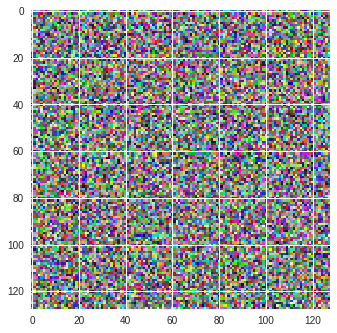

In [23]:
img = np.random.rand(128,128,3)
plt.imshow(img)
plt.show()

In [21]:
test_image2im = image.load_img('/content/cat_or_dog_2.jpg', target_size = (128, 128))
test_image2 = image.img_to_array(test_image2im) #3-d array
test_image2 = np.expand_dims(test_image2, axis = 0) #basically a reshape(1,-1) into tensor with 1 sample

result1 = classifier.predict(test_image1)
result2 = classifier.predict(test_image2)
training_set.class_indices

{'cats': 0, 'dogs': 1}

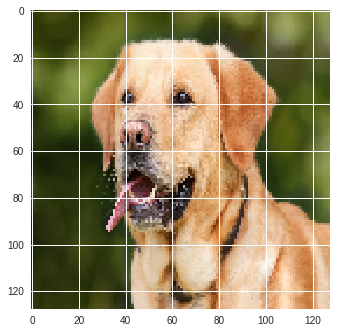

In [24]:
#Test image 1
plt.imshow(test_image1im)
plt.show()

In [25]:
print(result1[0][0])
if result1[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print (prediction)

1.0
dog


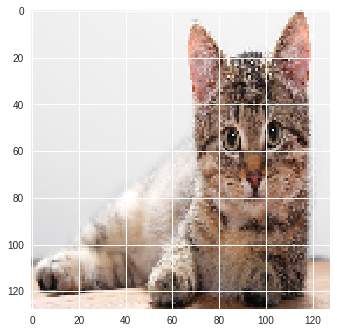

In [27]:
#Test image 2
plt.imshow(test_image2im)
plt.show()


In [28]:
print(result2[0][0])
if result2[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print (prediction)

0.0
cat
